# 02a - Cylinder Segmentation Demo

This notebook demonstrates mesh segmentation using a simple cylinder geometry. The cylinder represents the simplest case with genus = 0 (no holes).

In [1]:
from discos import create_cylinder_mesh, MeshManager, MeshSegmenter

## Create and Visualize Cylinder

In [2]:
# Create a cylinder mesh
cylinder = create_cylinder_mesh(radius=1.0, length=2.0, resolution=20)

cylinder = MeshManager(cylinder)
cylinder.print_mesh_analysis()
cylinder.visualize_mesh_3d(title="Original Cylinder", backend="plotly")


Mesh Analysis Report

Geometry:
  * Vertices: 42
  * Faces: 80
  * Components: 1
  * Volume: 6.18
  * Bounds: [-1.0, -1.0, -1.0] to [1.0, 1.0, 1.0]

Mesh Quality:
  * Watertight: True
  * Winding Consistent: True
  * Normal Direction: outward
  * Duplicate Vertices: 0
  * Degenerate Faces: 0

Topology:
  * Genus: 0
  * Euler Characteristic: 2

No issues detected

Recommendation:
  Mesh appears to be in good condition.


## Segment the Mesh

In [3]:
# Create segmenter and segment the mesh
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(cylinder.mesh, slice_height=0.5, min_volume=0.1)

print(f"Segmentation complete!")
print(f"Total segments: {len(segments)}")
print(f"Total slices: {len(segmenter.slices)}")

✅ Validated single-hull mesh: 80 external faces, volume=6.180
Computing 3 cross-sections from z=-1.00 to z=1.00
  Cross-section 0: z=-0.50, 40 line segments, area=0.000
  Cross-section 1: z=0.00, 40 line segments, area=0.000
  Cross-section 2: z=0.50, 40 line segments, area=0.000
✅ Computed 3 cross-sections, creating 4 slices

Processing slice 0: z=[-1.00, -0.50]
  🏷️  Annotated 80 external + 38 internal faces
  Slice 0: 1 closed volumes (segments)
    🔄 Transferred face attributes: 118 faces
    Segment seg_0_0: vol=1.545, ext_area=6.219, int_area=3.090

Processing slice 1: z=[-0.50, 0.00]
  🏷️  Annotated 110 external + 86 internal faces
  Slice 1: 1 closed volumes (segments)
    🔄 Transferred face attributes: 196 faces
    Segment seg_1_0: vol=1.545, ext_area=3.129, int_area=6.180

Processing slice 2: z=[0.00, 0.50]
  🏷️  Annotated 112 external + 84 internal faces
  Slice 2: 1 closed volumes (segments)
    🔄 Transferred face attributes: 196 faces
    Segment seg_2_0: vol=1.545, ext_a

## SegmentGraph

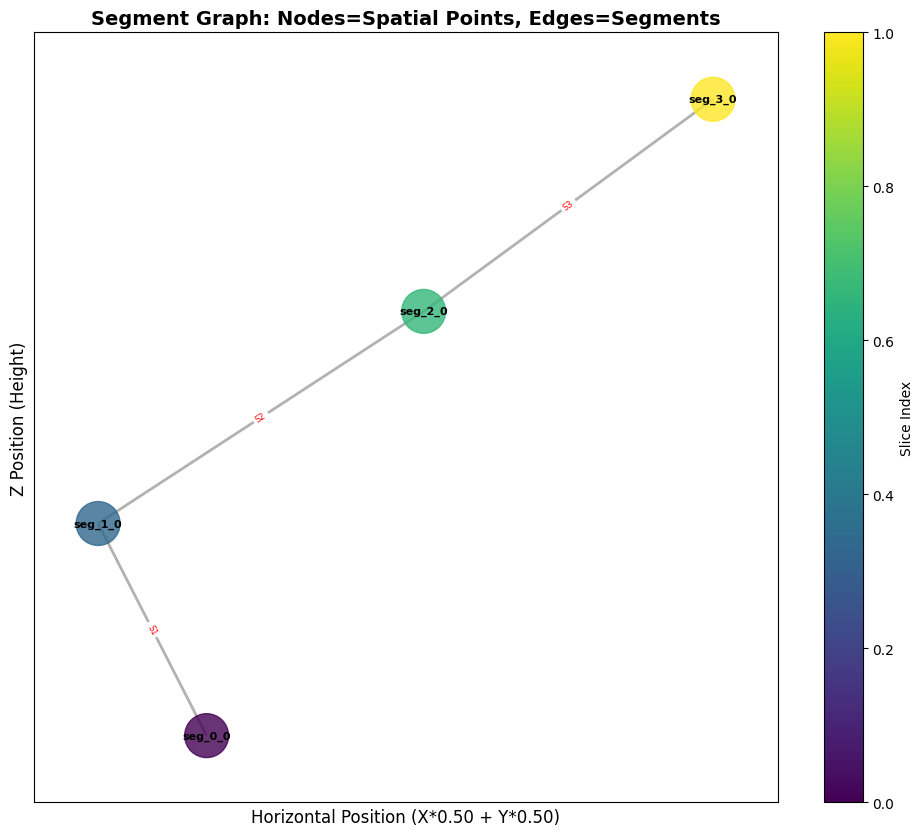

In [4]:
graph = segmenter.get_segment_graph()
_ = graph.visualize()

## Summary

The cylinder segmentation shows:
- **Simple topology**: Each slice typically contains one segment
- **Linear connectivity**: Segments connect in sequence along the z-axis
- **Volume distribution**: End caps may have smaller volumes due to geometry

This represents the baseline case for mesh segmentation with genus = 0 topology.